# Torsional Oscillator Experiments 
## Josh Berg and Aaron Titus, High Point University

### Experiment 1.4:  The angular velocity transducer 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit

In [2]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

### Trial 1

In [3]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Experiment1_5new-1.txt')

In [4]:
#print first five rows of data with the header
df_all.head(10)

,t (s),V_theta (V),V_omega (V)
0,0.00,0.740433,-0.029373
1,0.02,0.719452,-0.041389
2,0.04,0.689125,-0.056648
3,0.06,0.661850,-0.059509
4,0.08,0.619698,-0.077629
5,0.10,0.568199,-0.077629
6,0.12,0.507736,-0.086784
7,0.14,0.456429,-0.083733
8,0.16,0.389862,-0.107956
9,0.18,0.326538,-0.107956


This experiment is dedicated to getting a real-time indication of angular velocity. It is important to note that the static calibration velocity signal cannot be taken. The calibration constant we need is in the number of Volts per unit of angular velocity of the rotor. The easiest way to get this calibration is to use simple harmonic oscillation. Instead of using a 2-channel oscilloscope, this experiment was conducted using fits from logger pro. The rotor was pumped from 2.86 radians to 3.2 radians. 

In [5]:
m = (0.692376175402+0.680505240762)/2
print(m)

0.6864407080820001


#### Using Curve Fit out of Logger Pro 

In [6]:
t = np.arange(0,18,.02)
#theta = mV + b 
#"d" represents a derivative that was taken. All derivatives were calculated outside of python 
V_omega = 0.09363*np.cos(5.452*t + 1.797) - 0.01447# (V) 
V_theta = 0.6841*np.cos(5.452*t + 0.1948) +.05493 # (V) 
m_theta = 0.6864407080820001 # rad/V
b_theta = 0.167715119623 # rad
theta = m_theta*V_theta + b_theta
omega = -m_theta*5.452*0.6841*np.sin(5.452*t + 0.1948)

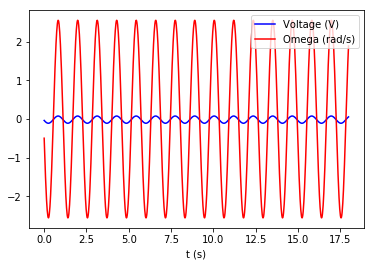

In [7]:
#plot graph
fig1 = plt.figure()
plt.xlabel('t (s)')
plt.plot(t,V_omega,'b-', label= 'Voltage (V)')
#plt.plot(t,V_theta,'g-', label= 'Voltage for theta (V)')
plt.plot(t,omega,'r-', label='Omega (rad/s)')
plt.legend(loc='upper right')
plt.show()

In [8]:
from scipy.optimize import curve_fit

In [9]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x +b #linear function

constants, stats = curve_fit(func,V_omega,omega)

#constants is a list
mbest=constants[0] #slope
bbest=constants[1] #intercept

ybest=func(V_omega,mbest,bbest) #y values for best fit function

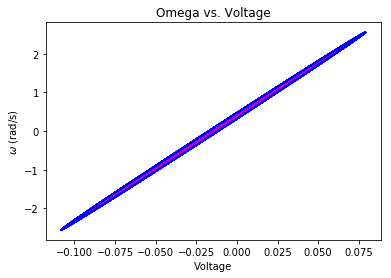

Best fit: m= 27.3250321415  and b= 0.394593535143


In [10]:
#plot graph
fig1 = plt.figure()
plt.title('Omega vs. Voltage')
plt.xlabel('Voltage')
plt.ylabel('$\omega$ (rad/s)')
plt.plot(V_omega,ybest,'m-')
plt.plot(V_omega,omega,'b-')
plt.show()
print("Best fit: m=",mbest," and b=",bbest)

$$\omega = mV_{\omega}$$ 

$$m = \frac{\omega}{V_{\omega}}$$

#### Using Loaded in Arrays 

In [11]:
t1 = np.array(df_all['t (s)'].tolist())
#theta = mV + b 
#"d" represents a derivative that was taken. All derivatives were calculated outside of python 
V_omega1 = np.array(df_all['V_omega (V)'].tolist())
V_theta1 = 0.6841*np.cos(5.452*t1 + 0.1948) +.05493 # (V) 
m_theta1 = 0.6864407080820001 # rad/V
b_theta1 = 0.167715119623 # rad
theta1 = m_theta1*V_theta1 + b_theta1
omega1 = -m_theta1*5.452*0.6841*np.sin(5.452*t1 + 0.1948)

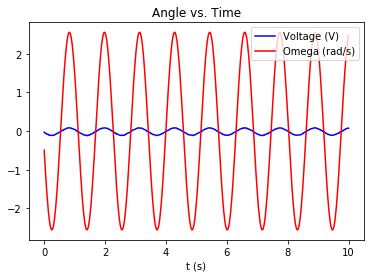

In [12]:
#plot graph
fig1 = plt.figure()
plt.title('Angle vs. Time')
plt.xlabel('t (s)')
plt.plot(t1,V_omega1,'b-', label= 'Voltage (V)')
plt.plot(t1,omega1,'r-', label='Omega (rad/s)')
plt.legend(loc='upper right')
plt.show()

In [13]:
from scipy.optimize import curve_fit

In [14]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x +b #linear function

constants, stats = curve_fit(func,V_omega1,omega1)

#constants is a list
mbest1=constants[0] #slope
bbest1=constants[1] #intercept

ybest1=func(V_omega1,mbest1,bbest1) #y values for best fit function

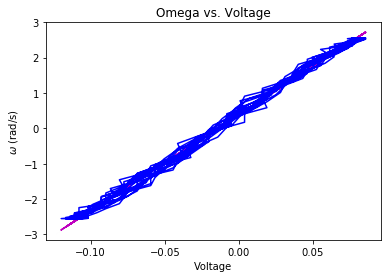

Best fit: m= 27.1999309847  and b= 0.391634597943


In [15]:
#plot graph
fig1 = plt.figure()
plt.title('Omega vs. Voltage')
plt.xlabel('Voltage')
plt.ylabel('$\omega$ (rad/s)')
plt.plot(V_omega1,ybest1,'m-')
plt.plot(V_omega1,omega1,'b-')
plt.show()
print("Best fit: m=",mbest1," and b=",bbest1)

### Trial 2 

In [16]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Experiment1_5new-2.txt')

In [17]:
#print first five rows of data with the header
df_all.head(10)

,t (s),V_theta (V),V_omega (V)
0,0.00,0.060463,-0.114059
1,0.02,-0.012016,-0.104904
2,0.04,-0.090599,-0.114059
3,0.06,-0.154114,-0.111008
4,0.08,-0.223541,-0.098801
5,0.10,-0.287056,-0.092888
6,0.12,-0.347519,-0.089836
7,0.14,-0.407982,-0.077629
8,0.16,-0.468445,-0.074768
9,0.18,-0.513649,-0.059509


#### Using Curve Fit out of Logger Pro 

In [18]:
t_a = np.arange(0,18,.02)
#theta = mV + b 
#"d" represents a derivative that was taken. All derivatives were calculated outside of python 
V_omega_a = 0.09118*np.cos(5.452*t + 3.164) -0.01456 # (V) 
V_theta_a = 0.6696*np.cos(5.451*t + 1.561) + 0.05616 # (V) 
m_theta_a = 0.6864407080820001 # rad/V
b_theta_a = 0.167715119623 # rad
theta_a = m_theta_a*V_theta_a + b_theta_a
omega_a = -m_theta_a*5.452*0.6696*np.sin(5.452*t + 1.561)

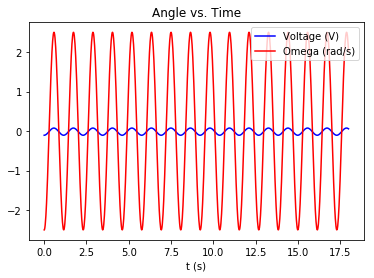

In [19]:
#plot graph
fig1 = plt.figure()
plt.title('Angle vs. Time')
plt.xlabel('t (s)')
plt.plot(t_a,V_omega_a,'b-', label= 'Voltage (V)')
plt.plot(t_a,omega_a,'r-', label='Omega (rad/s)')
plt.legend(loc='upper right')
plt.show()

In [20]:
from scipy.optimize import curve_fit

In [21]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x +b #linear function

constants, stats = curve_fit(func,V_omega_a,omega_a)

#constants is a list
mbest_a=constants[0] #slope
bbest_a=constants[1] #intercept

ybest_a=func(V_omega_a,mbest_a,bbest_a) #y values for best fit function

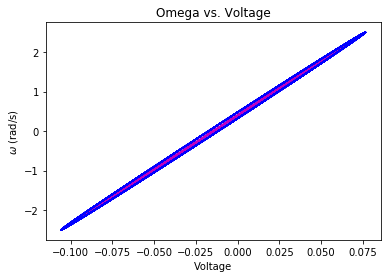

Best fit: m= 27.473470188  and b= 0.398567793826


In [22]:
#plot graph
fig1 = plt.figure()
plt.title('Omega vs. Voltage')
plt.xlabel('Voltage')
plt.ylabel('$\omega$ (rad/s)')
plt.plot(V_omega_a,ybest_a,'m-')
plt.plot(V_omega_a,omega_a,'b-')
plt.show()
print("Best fit: m=",mbest_a," and b=",bbest_a)

#### Using Loaded in Arrays 

In [23]:
t_a1 = np.array(df_all['t (s)'].tolist())
#theta = mV + b 
#"d" represents a derivative that was taken. All derivatives were calculated outside of python 
V_omega_a1 = np.array(df_all['V_omega (V)'].tolist())
V_theta_a1 = 0.6696*np.cos(5.451*t_a1 + 1.561) + 0.05616 # (V) 
m_theta_a1 = 0.6864407080820001 # rad/V
b_theta_a1 = 0.167715119623 # rad
theta_a1 = m_theta_a1*V_theta_a1 + b_theta_a1
omega_a1 = -m_theta_a1*5.452*0.6696*np.sin(5.452*t_a1 + 1.561)

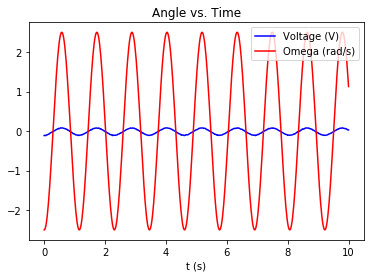

In [24]:
#plot graph
fig1 = plt.figure()
plt.title('Angle vs. Time')
plt.xlabel('t (s)')
plt.plot(t_a1,V_omega_a1,'b-', label= 'Voltage (V)')
plt.plot(t_a1,omega_a1,'r-', label='Omega (rad/s)')
plt.legend(loc='upper right')
plt.show()

In [25]:
from scipy.optimize import curve_fit

In [26]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x +b #linear function

constants, stats = curve_fit(func,V_omega_a1,omega_a1)

#constants is a list
mbest_a1=constants[0] #slope
bbest_a1=constants[1] #intercept

ybest_a1=func(V_omega_a1,mbest_a1,bbest_a1) #y values for best fit function

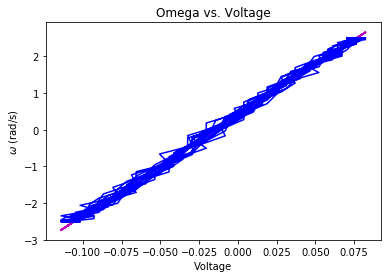

Best fit: m= 27.3751037125  and b= 0.396785215782


In [27]:
#plot graph
fig1 = plt.figure()
plt.title('Omega vs. Voltage')
plt.xlabel('Voltage')
plt.ylabel('$\omega$ (rad/s)')
plt.plot(V_omega_a1,ybest_a1,'m-')
plt.plot(V_omega_a1,omega_a1,'b-')
plt.show()
print("Best fit: m=",mbest_a1," and b=",bbest_a1)

### Trial 3

In [28]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Experiment1_5new-3.txt')

In [29]:
#print first five rows of data with the header
df_all.head(10)

,t (s),V_theta (V),V_omega (V)
0,0.00,0.716400,0.012970
1,0.02,0.734520,0.003815
2,0.04,0.755692,-0.008202
3,0.06,0.761604,-0.020409
4,0.08,0.752640,-0.032425
5,0.10,0.746536,-0.035477
6,0.12,0.719452,-0.050545
7,0.14,0.686073,-0.059509
8,0.16,0.649834,-0.065613
9,0.18,0.598526,-0.068665


#### Using Curve Fit out of Logger Pro 

In [30]:
t_b = np.arange(0,18,.02)
#theta = mV + b 
#"d" represents a derivative that was taken. All derivatives were calculated outside of python 
V_omega_b = 0.09444*np.cos(5.452*t + 1.304) - 0.01408# (V) 
V_theta_b = 0.6928*np.cos(5.452*t + 5.981) +.05522 # (V) 
m_theta_b = 0.6864407080820001 # rad/V
b_theta_b = 0.167715119623 # rad
theta_b = m_theta_b*V_theta_b + b_theta_b
omega_b = -m_theta_b*5.452*0.6928*np.sin(5.452*t + 5.981)

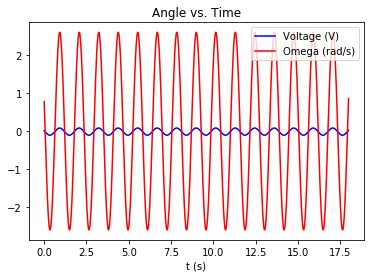

In [31]:
#plot graph
fig1 = plt.figure()
plt.title('Angle vs. Time')
plt.xlabel('t (s)')
plt.plot(t_b,V_omega_b,'b-', label= 'Voltage (V)')
plt.plot(t_b,omega_b,'r-', label='Omega (rad/s)')
plt.legend(loc='upper right')
plt.show()

In [32]:
from scipy.optimize import curve_fit

In [33]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x +b #linear function

constants, stats = curve_fit(func,V_omega_b,omega_b)

#constants is a list
mbest_b=constants[0] #slope
bbest_b=constants[1] #intercept

ybest_b=func(V_omega_b,mbest_b,bbest_b) #y values for best fit function

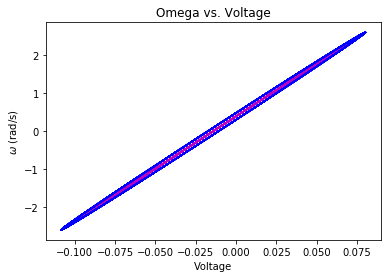

Best fit: m= 27.4363944371  and b= 0.386212584117


In [34]:
#plot graph
fig1 = plt.figure()
plt.title('Omega vs. Voltage')
plt.xlabel('Voltage')
plt.ylabel('$\omega$ (rad/s)')
plt.plot(V_omega_b,ybest_b,'m-')
plt.plot(V_omega_b,omega_b,'b-')
plt.show()
print("Best fit: m=",mbest_b," and b=",bbest_b)

#### Using Loaded in Arrays 

In [35]:
t_b1 = np.array(df_all['t (s)'].tolist())
#theta = mV + b 
#"d" represents a derivative that was taken. All derivatives were calculated outside of python 
V_omega_b1 = np.array(df_all['V_omega (V)'].tolist())
V_theta_b1 = 0.6928*np.cos(5.452*t_b1 + 5.981) +.05522 # (V) 
m_theta_b1 = 0.6864407080820001 # rad/V
b_theta_b1 = 0.167715119623 # rad
theta_b1 = m_theta_b1*V_theta_b1 + b_theta_b1
omega_b1 = -m_theta_b1*5.452*0.6928*np.sin(5.452*t_b1 + 5.981)

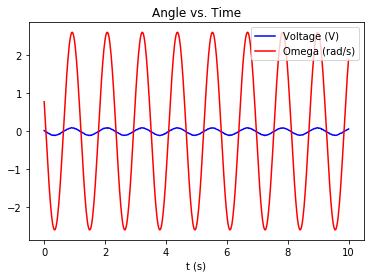

In [36]:
#plot graph
fig1 = plt.figure()
plt.title('Angle vs. Time')
plt.xlabel('t (s)')
plt.plot(t_b1,V_omega_b1,'b-', label= 'Voltage (V)')
plt.plot(t_b1,omega_b1,'r-', label='Omega (rad/s)')
plt.legend(loc='upper right')
plt.show()

In [37]:
from scipy.optimize import curve_fit

In [38]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x +b #linear function

constants, stats = curve_fit(func,V_omega_b1,omega_b1)

#constants is a list
mbest_b1=constants[0] #slope
bbest_b1=constants[1] #intercept

ybest_b1=func(V_omega_b1,mbest_b1,bbest_b1) #y values for best fit function

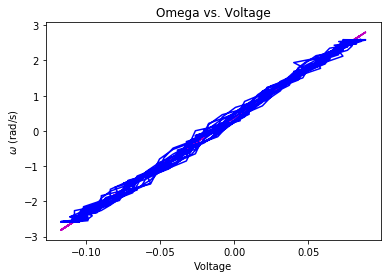

Best fit: m= 27.3211422456  and b= 0.383611185897


In [39]:
#plot graph
fig1 = plt.figure()
plt.title('Omega vs. Voltage')
plt.xlabel('Voltage')
plt.ylabel('$\omega$ (rad/s)')
plt.plot(V_omega_b1,ybest_b1,'m-')
plt.plot(V_omega_b1,omega_b1,'b-')
plt.show()
print("Best fit: m=",mbest_b1," and b=",bbest_b1)

In [43]:
average_m_omega = (mbest+mbest_a+mbest_b)/3
average_b_omega = (bbest+bbest_a+bbest_b)/3
print(average_m_omega)
print(average_b_omega)
avgdev = (np.abs(mbest-average_m_omega)+np.abs(mbest_a-average_m_omega)+np.abs(mbest_b-average_m_omega))/3
print(avgdev)


27.4116322555
0.393124637695
0.0577334093523


In [41]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Averages1_4.txt')

In [42]:
#print first five rows of data with the header
df_all.head(10)

,Trial,m_omega,b_omega
0,1,27.325032,0.394594
1,2,27.473470,0.398568
2,3,27.436394,0.386213
3,Avg,27.411632,0.393125


The table above shows the slope of omega (m_omega) and y-intercept of omega (b_omega) calculated from the curve fits of the oscillation for three different trials as well as the average. 